In [27]:
import pandas as pd
import plotly.express as px

# Change pandas display options to show all rows and columns
pd.set_option('display.max_rows', None)  # Display all rows
pd.set_option('display.max_columns', None)  # Display all columns



In [ ]:
# Load dataset
file_path = 'pokemon.csv'
data = pd.read_csv(file_path)

# Explore the data
data.info()  

In [52]:
# Check for and handle missing values
data.isnull().sum()

id                    0
user_id               0
QoA_VLCresolution     0
QoA_VLCbitrate        0
QoA_VLCframerate      0
QoA_VLCdropped        0
QoA_VLCaudiorate      0
QoA_VLCaudioloss      0
QoA_BUFFERINGcount    0
QoA_BUFFERINGtime     0
QoS_type              0
QoS_operator          0
QoD_model             0
QoD_os-version        0
QoD_api-level         0
QoU_sex               0
QoU_age               0
QoU_Ustedy            0
QoF_begin             0
QoF_shift             0
QoF_audio             0
QoF_video             0
MOS                   0
dtype: int64

In [4]:
print("Shape of Dataset:", data.shape)
print("\nColumns in Dataset:", data.columns)

Shape of Dataset: (1543, 23)

Columns in Dataset: Index(['id', 'user_id', 'QoA_VLCresolution', 'QoA_VLCbitrate',
       'QoA_VLCframerate', 'QoA_VLCdropped', 'QoA_VLCaudiorate',
       'QoA_VLCaudioloss', 'QoA_BUFFERINGcount', 'QoA_BUFFERINGtime',
       'QoS_type', 'QoS_operator', 'QoD_model', 'QoD_os-version',
       'QoD_api-level', 'QoU_sex', 'QoU_age', 'QoU_Ustedy', 'QoF_begin',
       'QoF_shift', 'QoF_audio', 'QoF_video', 'MOS'],
      dtype='object')


In [6]:
# Step 1: Identify Duplicates Ignoring the 'id' Column
duplicates = data[data.duplicated(subset=data.columns.difference(['id']), keep=False)]
print("\nDuplicate Rows (excluding 'id'):")
print(duplicates)
print("\nNumber of Duplicate Rows (excluding 'id'):", len(duplicates))


Duplicate Rows (excluding 'id'):
     id  user_id  QoA_VLCresolution  QoA_VLCbitrate  QoA_VLCframerate  \
10  348       35                360        754.5763         25.266667   
11  349       35                360        754.5763         25.266667   

    QoA_VLCdropped  QoA_VLCaudiorate  QoA_VLCaudioloss  QoA_BUFFERINGcount  \
10               1             44.15                 0                   2   
11               1             44.15                 0                   2   

    QoA_BUFFERINGtime  ...        QoD_os-version  QoD_api-level QoU_sex  \
10                916  ...  4.4.2(G900FXXU1ANG2)             19       0   
11                916  ...  4.4.2(G900FXXU1ANG2)             19       0   

   QoU_age  QoU_Ustedy  QoF_begin  QoF_shift  QoF_audio  QoF_video  MOS  
10      37           5          4          4          4          4    4  
11      37           5          4          4          4          4    4  

[2 rows x 23 columns]

Number of Duplicate Rows (excluding 'id

In [7]:
# Step 2: Remove Duplicate Rows
data_cleaned = data.drop_duplicates(subset=data.columns.difference(['id']), keep='first')
print("\nShape of Dataset After Removing Duplicates (excluding 'id'):", data_cleaned.shape)



Shape of Dataset After Removing Duplicates (excluding 'id'): (1542, 23)

Shape of Dataset After Removing Duplicates (excluding 'id'): (1542, 23)


In [8]:
# Step 3: Verify if Dataset is Clean
print("\nNumber of Duplicates After Cleaning (excluding 'id'):", 
      data_cleaned.duplicated(subset=data_cleaned.columns.difference(['id']), keep=False).sum())



Number of Duplicates After Cleaning (excluding 'id'): 0


In [9]:
# Step 4: Replace Original Dataset
data = data_cleaned
print("\nCleaned Dataset:")
print(data.head())


Cleaned Dataset:
     id  user_id  QoA_VLCresolution  QoA_VLCbitrate  QoA_VLCframerate  \
0   590       71                360       528.39294         24.950000   
1   428       46                360       402.64664         30.066667   
2   406       44                360       735.84070         24.200000   
3  1256      133                240       529.48830         24.116667   
4   244       22                360       736.00085         24.066667   

   QoA_VLCdropped  QoA_VLCaudiorate  QoA_VLCaudioloss  QoA_BUFFERINGcount  \
0               0         43.800000                 0                   2   
1               0         44.200000                 0                   2   
2               0         44.183333                 0                   2   
3               9         43.850000                 0                   2   
4               0         43.850000                 0                   2   

   QoA_BUFFERINGtime  ...       QoD_os-version  QoD_api-level QoU_sex QoU_age  \

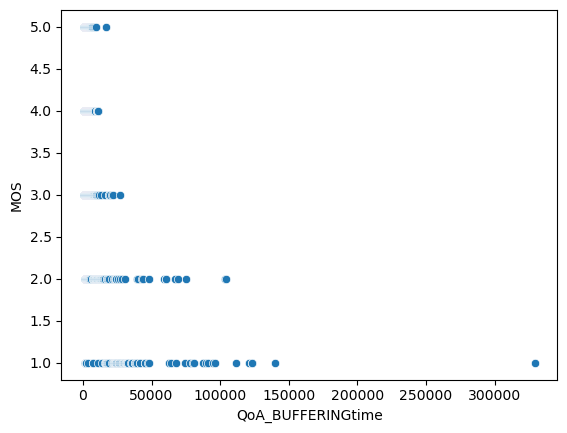

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x='QoA_BUFFERINGtime', y='MOS', data=data)
plt.show()


In [56]:
# Select features for analysis
features = ['QoA_BUFFERINGtime', 'MOS'] 
data_selected = data[features]

In [58]:
# Normalize numerical features to bring them to the same scale
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data_selected_scaled = pd.DataFrame(
    scaler.fit_transform(data_selected),
    columns=features
)


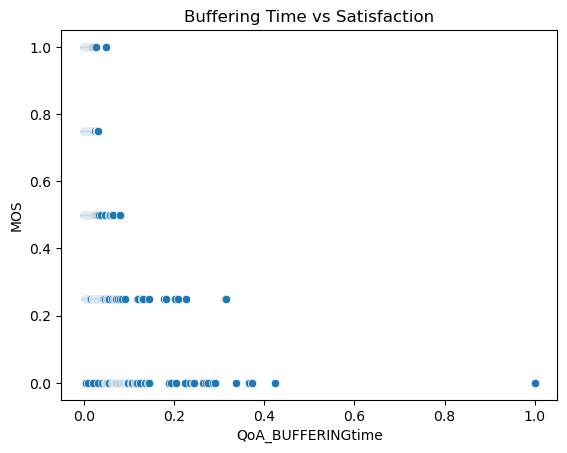

In [59]:
# exploring relationships and potential anomalies
sns.scatterplot(x='QoA_BUFFERINGtime', y='MOS', data=data_selected_scaled)
plt.title('Buffering Time vs Satisfaction')
plt.show()


                   QoA_BUFFERINGtime       MOS
QoA_BUFFERINGtime           1.000000 -0.482378
MOS                        -0.482378  1.000000


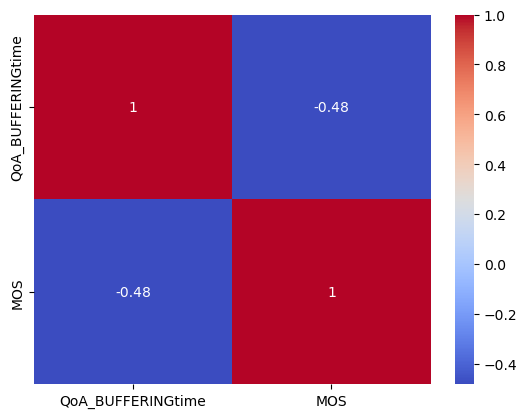

In [60]:
# Finding Correlation
print(data_selected.corr())
sns.heatmap(data_selected.corr(), annot=True, cmap='coolwarm')
plt.show()


In [69]:
# Using Z score
from scipy.stats import zscore

# Compute Z-scores
data_selected_scaled['z_score_buffering'] = zscore(data_selected_scaled['QoA_BUFFERINGtime'])
data_selected_scaled['z_score_satisfaction'] = zscore(data_selected_scaled['MOS'])

# Flag anomalies (e.g., Z-scores > 3 or < -3)
# Mark anomalies (±3 standard deviations)
data_selected_scaled['z_score_anomaly'] = (
    (data_selected_scaled['z_score_buffering'].abs() > 3) |
    (data_selected_scaled['z_score_satisfaction'].abs() > 3)
).astype(int)

print(f"Number of anomalies detected: {len(anomalies)}")
print(anomalies)

Number of anomalies detected: 78
      QoA_BUFFERINGtime   MOS  z_score_buffering  z_score_satisfaction  \
87             0.001866  0.00          -0.323955             -2.559356   
121            0.002276  0.00          -0.314971             -2.559356   
191            0.002861  0.00          -0.302195             -2.559356   
295            0.003539  0.00          -0.287355             -2.559356   
315            0.003658  0.00          -0.284760             -2.559356   
424            0.004309  0.00          -0.270519             -2.559356   
483            0.004635  0.00          -0.263399             -2.559356   
564            0.005085  0.00          -0.253550             -2.559356   
585            0.005192  0.00          -0.251221             -2.559356   
620            0.005362  0.00          -0.247494             -2.559356   
1014           0.008247  0.00          -0.184409             -2.559356   
1339           0.018920  1.00           0.048965              1.228737   
1349 

In [70]:
# Anomaly Detection Using Isolation Forest
from sklearn.ensemble import IsolationForest

iso = IsolationForest(contamination=0.05, random_state=42)  # 5% anomalies
data_selected_scaled['isolation_forest_anomaly'] = iso.fit_predict(data_selected_scaled[features])

# Convert Isolation Forest output: -1 for anomaly, 1 for normal
data_selected_scaled['isolation_forest_anomaly'] = data_selected_scaled['isolation_forest_anomaly'].apply(lambda x: 1 if x == -1 else 0)

# Compare results
print(data_selected_scaled[['z_score_anomaly', 'isolation_forest_anomaly']].value_counts())



z_score_anomaly  isolation_forest_anomaly
0                0                           1465
                 1                             52
1                1                             26
Name: count, dtype: int64


In [74]:
# Identifying rows that are considered anomalies by one method but not the other

# Anomalies detected by Z-Score but not by Isolation Forest
zscore_only = data_selected_scaled[(data_selected_scaled['z_score_anomaly'] == 1) & (data_selected_scaled['isolation_forest_anomaly'] == 0)]
print("Anomalies detected by Z-Score only:")
print(zscore_only)

# Anomalies detected by Isolation Forest but not by Z-Score
isolation_only = data_selected_scaled[(data_selected_scaled['z_score_anomaly'] == 0) & (data_selected_scaled['isolation_forest_anomaly'] == 1)]
print("Anomalies detected by Isolation Forest only:")
print(isolation_only)

# Anomalies detected by both methods
common_anomalies = data_selected_scaled[(data_selected_scaled['z_score_anomaly'] == 1) & (data_selected_scaled['isolation_forest_anomaly'] == 1)]
print("Common anomalies detected by both:")
print(common_anomalies)


Anomalies detected by Z-Score only:
Empty DataFrame
Columns: [QoA_BUFFERINGtime, MOS, z_score_buffering, z_score_satisfaction, anomaly_score, z_score_anomaly, isolation_forest_anomaly]
Index: []
Anomalies detected by Isolation Forest only:
      QoA_BUFFERINGtime   MOS  z_score_buffering  z_score_satisfaction  \
87             0.001866  0.00          -0.323955             -2.559356   
121            0.002276  0.00          -0.314971             -2.559356   
191            0.002861  0.00          -0.302195             -2.559356   
295            0.003539  0.00          -0.287355             -2.559356   
315            0.003658  0.00          -0.284760             -2.559356   
424            0.004309  0.00          -0.270519             -2.559356   
483            0.004635  0.00          -0.263399             -2.559356   
564            0.005085  0.00          -0.253550             -2.559356   
585            0.005192  0.00          -0.251221             -2.559356   
620            0.005

In [75]:
# Investigate Z-Score anomalies
print("Characteristics of Z-Score anomalies:")
print(zscore_only.describe())

# Investigate Isolation Forest anomalies
print("Characteristics of Isolation Forest anomalies:")
print(isolation_only.describe())

# Investigate common anomalies
print("Characteristics of common anomalies:")
print(common_anomalies.describe())


Characteristics of Z-Score anomalies:
       QoA_BUFFERINGtime  MOS  z_score_buffering  z_score_satisfaction  \
count                0.0  0.0                0.0                   0.0   
mean                 NaN  NaN                NaN                   NaN   
std                  NaN  NaN                NaN                   NaN   
min                  NaN  NaN                NaN                   NaN   
25%                  NaN  NaN                NaN                   NaN   
50%                  NaN  NaN                NaN                   NaN   
75%                  NaN  NaN                NaN                   NaN   
max                  NaN  NaN                NaN                   NaN   

       anomaly_score  z_score_anomaly  isolation_forest_anomaly  
count            0.0              0.0                       0.0  
mean             NaN              NaN                       NaN  
std              NaN              NaN                       NaN  
min              NaN           

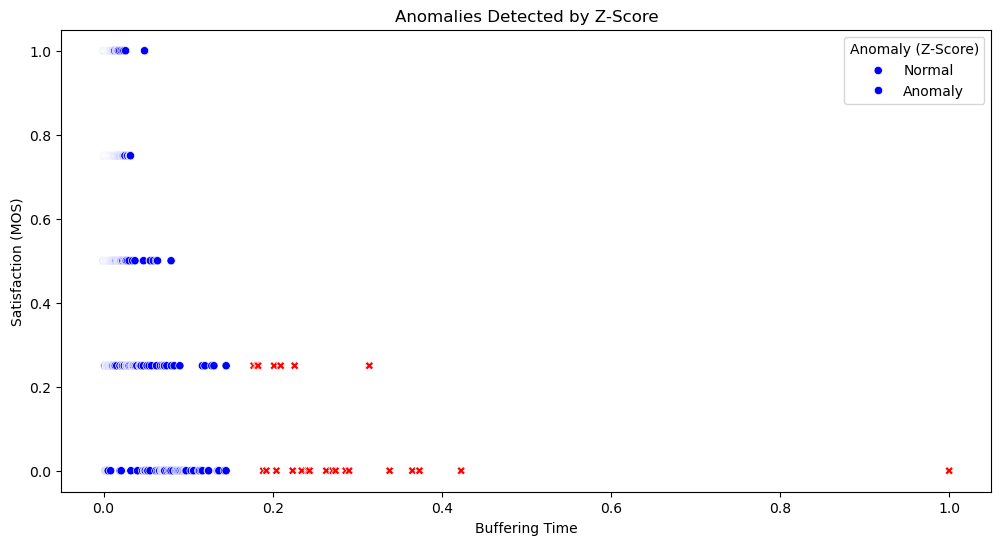

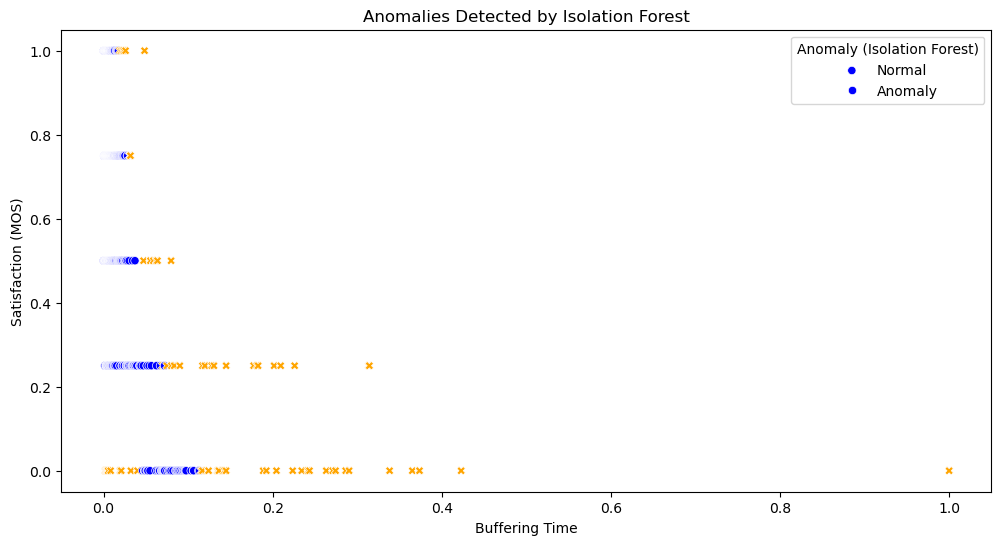

In [77]:

# Scatter plot: Z-Score anomalies
plt.figure(figsize=(12, 6))
sns.scatterplot(
    x='QoA_BUFFERINGtime',
    y='MOS',
    data=data_selected_scaled,
    hue='z_score_anomaly',
    palette={0: 'blue', 1: 'red'},
    style='z_score_anomaly'
)
plt.title('Anomalies Detected by Z-Score')
plt.xlabel('Buffering Time')
plt.ylabel('Satisfaction (MOS)')
plt.legend(title='Anomaly (Z-Score)', labels=['Normal', 'Anomaly'])
plt.show()

# Scatter plot: Isolation Forest anomalies
plt.figure(figsize=(12, 6))
sns.scatterplot(
    x='QoA_BUFFERINGtime',
    y='MOS',
    data=data_selected_scaled,
    hue='isolation_forest_anomaly',
    palette={0: 'blue', 1: 'orange'},
    style='isolation_forest_anomaly'
)
plt.title('Anomalies Detected by Isolation Forest')
plt.xlabel('Buffering Time')
plt.ylabel('Satisfaction (MOS)')
plt.legend(title='Anomaly (Isolation Forest)', labels=['Normal', 'Anomaly'])
plt.show()


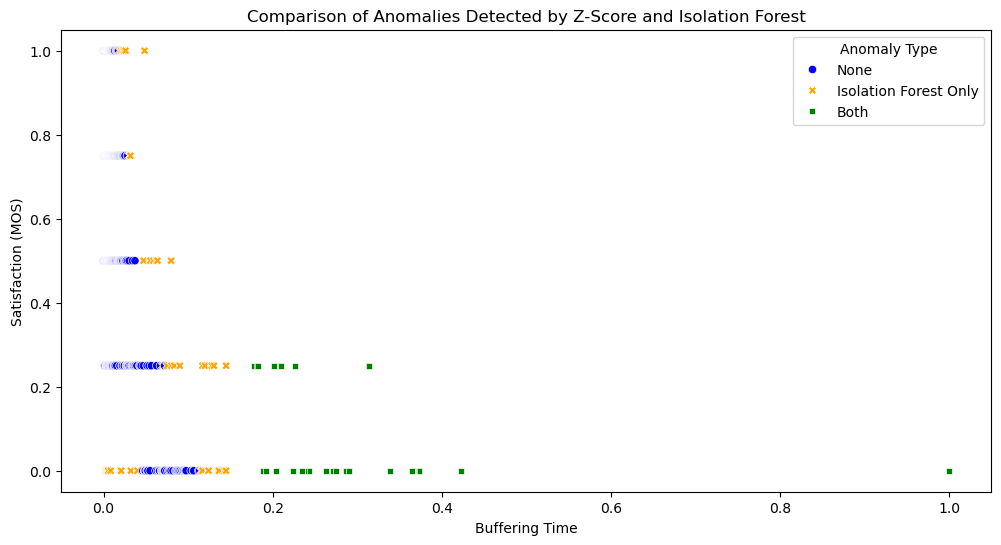

In [79]:
# Create a column to distinguish anomaly type
data_selected_scaled['anomaly_type'] = 'None'
data_selected_scaled.loc[zscore_only.index, 'anomaly_type'] = 'Z-Score Only'
data_selected_scaled.loc[isolation_only.index, 'anomaly_type'] = 'Isolation Forest Only'
data_selected_scaled.loc[common_anomalies.index, 'anomaly_type'] = 'Both'

# Scatter plot: Overlap of anomalies
plt.figure(figsize=(12, 6))
sns.scatterplot(
    x='QoA_BUFFERINGtime',
    y='MOS',
    data=data_selected_scaled,
    hue='anomaly_type',
    style='anomaly_type',
    palette={'None': 'blue', 'Z-Score Only': 'red', 'Isolation Forest Only': 'orange', 'Both': 'green'}
)
plt.title('Comparison of Anomalies Detected by Z-Score and Isolation Forest')
plt.xlabel('Buffering Time')
plt.ylabel('Satisfaction (MOS)')
plt.legend(title='Anomaly Type')
plt.show()


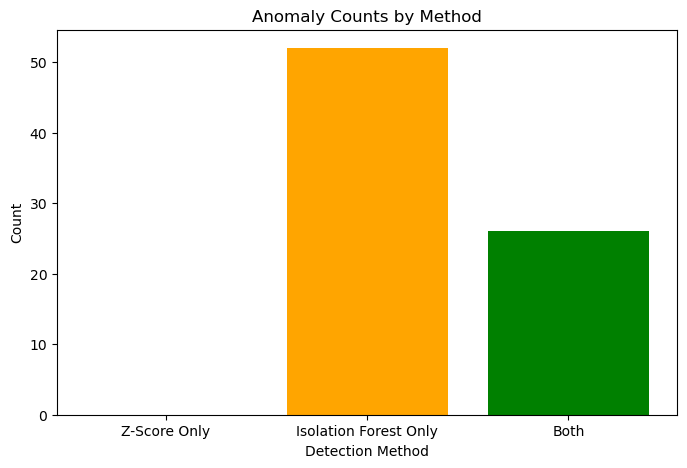

In [80]:
# Count anomalies by type
anomaly_counts = {
    'Z-Score Only': len(zscore_only),
    'Isolation Forest Only': len(isolation_only),
    'Both': len(common_anomalies)
}

# Create a bar plot
plt.figure(figsize=(8, 5))
plt.bar(anomaly_counts.keys(), anomaly_counts.values(), color=['red', 'orange', 'green'])
plt.title('Anomaly Counts by Method')
plt.ylabel('Count')
plt.xlabel('Detection Method')
plt.show()


/var/folders/qr/p596y49115zbhg_s900sljzh0000gn/T/ipykernel_89048/4119197386.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




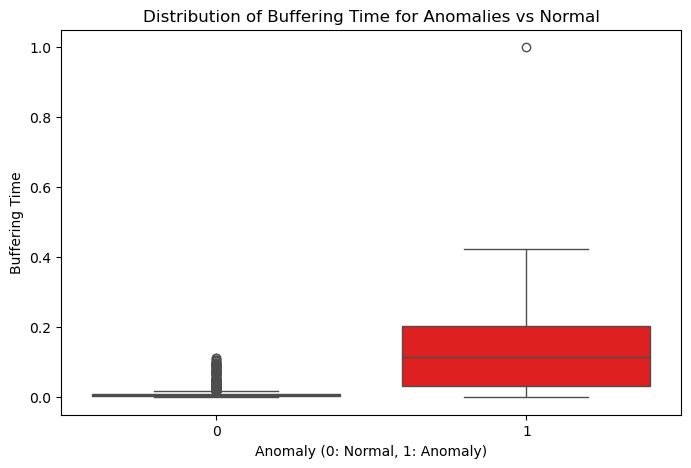

/var/folders/qr/p596y49115zbhg_s900sljzh0000gn/T/ipykernel_89048/4119197386.py:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




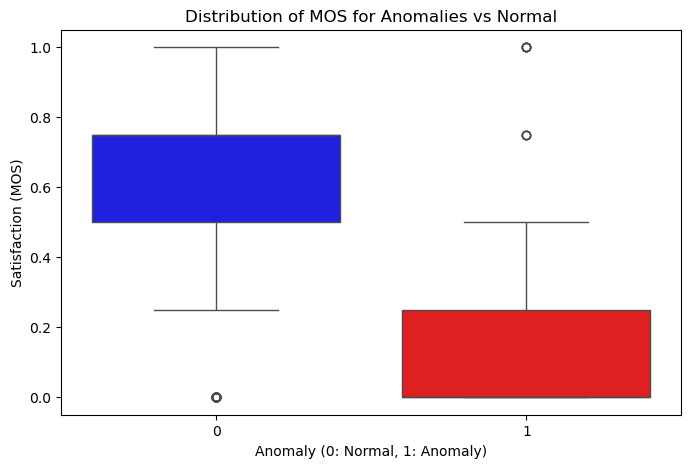

In [81]:
# Add a general anomaly label (1 if anomaly detected by any method, else 0)
data_selected_scaled['any_anomaly'] = ((data_selected_scaled['z_score_anomaly'] == 1) | (data_selected_scaled['isolation_forest_anomaly'] == 1)).astype(int)

# Boxplots for Buffering Time
plt.figure(figsize=(8, 5))
sns.boxplot(x='any_anomaly', y='QoA_BUFFERINGtime', data=data_selected_scaled, palette=['blue', 'red'])
plt.title('Distribution of Buffering Time for Anomalies vs Normal')
plt.xlabel('Anomaly (0: Normal, 1: Anomaly)')
plt.ylabel('Buffering Time')
plt.show()

# Boxplots for Satisfaction
plt.figure(figsize=(8, 5))
sns.boxplot(x='any_anomaly', y='MOS', data=data_selected_scaled, palette=['blue', 'red'])
plt.title('Distribution of MOS for Anomalies vs Normal')
plt.xlabel('Anomaly (0: Normal, 1: Anomaly)')
plt.ylabel('Satisfaction (MOS)')
plt.show()


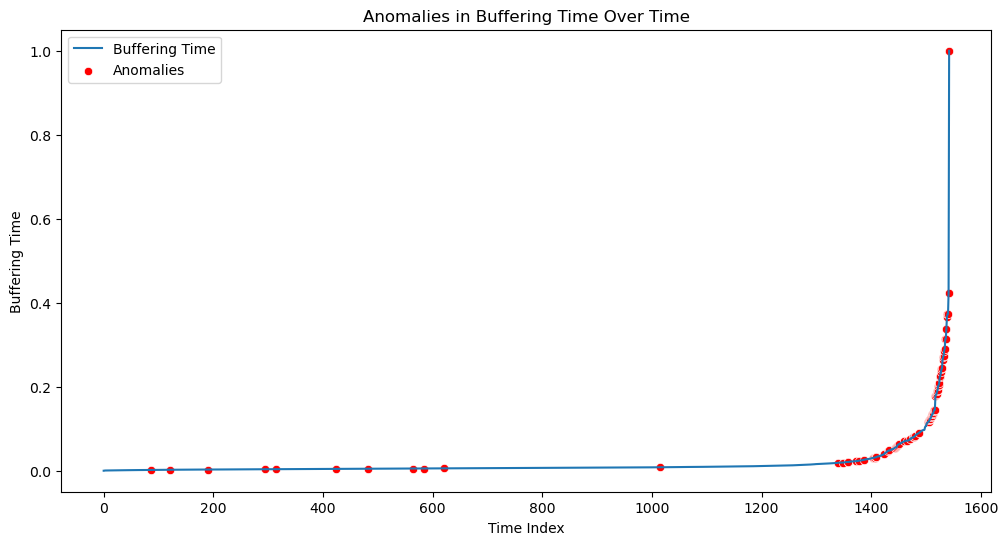

In [83]:
# Assuming the data has a time column, e.g., 'time_index'
data_selected_scaled['time_index'] = range(len(data_selected_scaled))  # Dummy time index is used as it is not present

plt.figure(figsize=(12, 6))
sns.lineplot(x='time_index', y='QoA_BUFFERINGtime', data=data_selected_scaled, label='Buffering Time')
sns.scatterplot(
    x='time_index',
    y='QoA_BUFFERINGtime',
    data=data_selected_scaled[data_selected_scaled['any_anomaly'] == 1],
    color='red',
    label='Anomalies'
)
plt.title('Anomalies in Buffering Time Over Time')
plt.xlabel('Time Index')
plt.ylabel('Buffering Time')
plt.legend()
plt.show()


In [85]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import numpy as np


# Select features for clustering
features = ['QoA_BUFFERINGtime', 'MOS']  # Adjust based on dataset columns
data_clustering = data_selected_scaled[features].copy()

# Normalize the data
scaler = StandardScaler()
data_normalized = scaler.fit_transform(data_clustering)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjust `eps` and `min_samples` based on the data
data_clustering['dbscan_cluster'] = dbscan.fit_predict(data_normalized)

# Anomalies are points in cluster -1
data_clustering['anomaly'] = (data_clustering['dbscan_cluster'] == -1).astype(int)

# Print the number of anomalies
num_anomalies = data_clustering['anomaly'].sum()
print(f"Number of anomalies detected: {num_anomalies}")

# Add anomaly labels to the original data for analysis
data_selected_scaled['dbscan_anomaly'] = data_clustering['anomaly']


Number of anomalies detected: 16


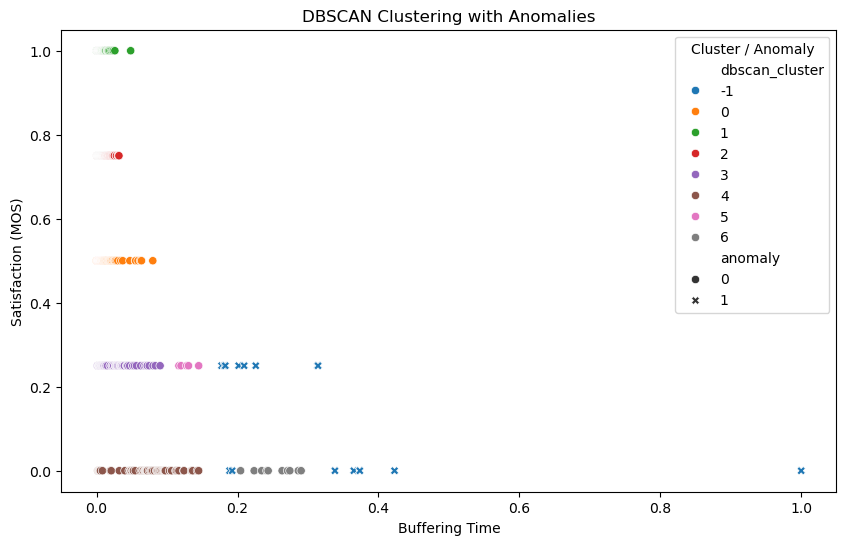

In [86]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='QoA_BUFFERINGtime',
    y='MOS',
    data=data_clustering,
    hue='dbscan_cluster',
    palette='tab10',
    style='anomaly',
    markers={0: 'o', 1: 'X'},
    legend='full'
)
plt.title('DBSCAN Clustering with Anomalies')
plt.xlabel('Buffering Time')
plt.ylabel('Satisfaction (MOS)')
plt.legend(title='Cluster / Anomaly')
plt.show()


/var/folders/qr/p596y49115zbhg_s900sljzh0000gn/T/ipykernel_89048/466716227.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




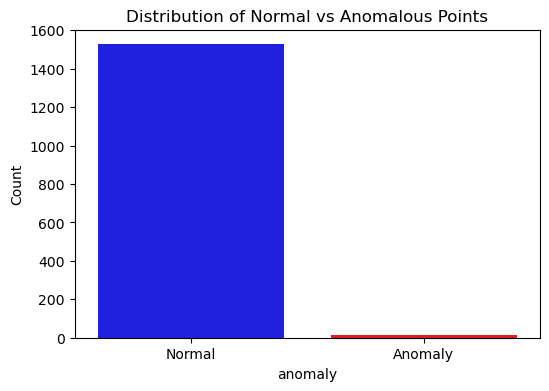

In [87]:
# Count anomalies and normal points
counts = data_clustering['anomaly'].value_counts()

# Bar plot for anomaly distribution
plt.figure(figsize=(6, 4))
sns.barplot(x=counts.index, y=counts.values, palette=['blue', 'red'])
plt.title('Distribution of Normal vs Anomalous Points')
plt.xticks(ticks=[0, 1], labels=['Normal', 'Anomaly'])
plt.ylabel('Count')
plt.show()


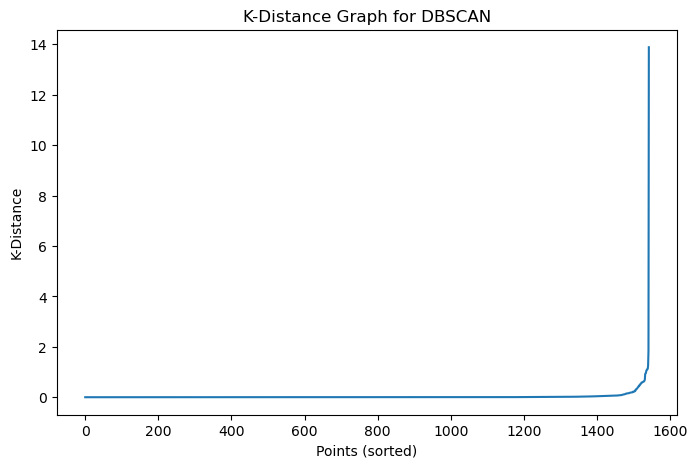

In [88]:
from sklearn.neighbors import NearestNeighbors

# Compute the k-distance graph
k = 5  # Same as min_samples
nbrs = NearestNeighbors(n_neighbors=k).fit(data_normalized)
distances, _ = nbrs.kneighbors(data_normalized)

# Plot the sorted k-distance graph
distances = np.sort(distances[:, k-1])  # Take the k-th nearest distance
plt.figure(figsize=(8, 5))
plt.plot(distances)
plt.title('K-Distance Graph for DBSCAN')
plt.xlabel('Points (sorted)')
plt.ylabel('K-Distance')
plt.show()


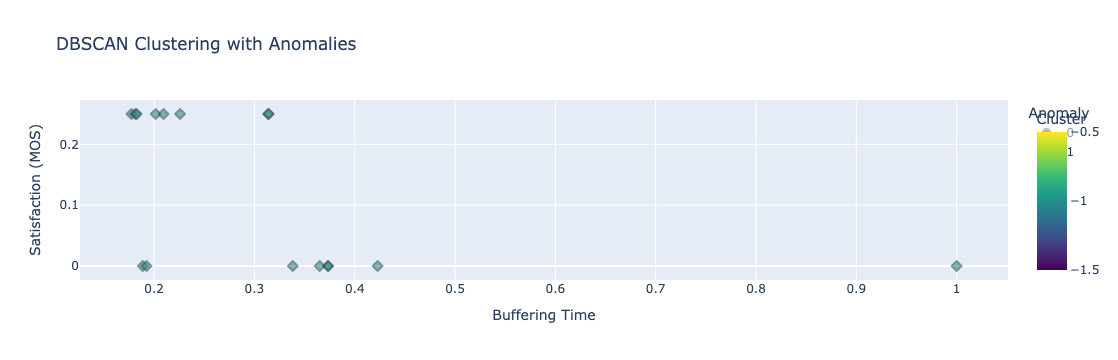

In [89]:
import plotly.express as px

# Create a scatter plot for clustering
fig = px.scatter(
    data_frame=data_clustering, 
    x='QoA_BUFFERINGtime', 
    y='MOS',
    color='dbscan_cluster',  # Color by cluster ID
    symbol='anomaly',  # Mark anomalies with a different symbol (X for anomalies)
    color_continuous_scale='Viridis',  # Color scheme for clusters
    labels={'dbscan_cluster': 'Cluster', 'anomaly': 'Anomaly'},
    title="DBSCAN Clustering with Anomalies"
)

# Update the plot with specific markers for anomalies
fig.update_traces(marker=dict(size=8, opacity=0.6, line=dict(width=2, color='DarkSlateGrey')))
fig.update_layout(
    xaxis_title="Buffering Time",
    yaxis_title="Satisfaction (MOS)",
    showlegend=True
)

# Show the plot
fig.show()


In [2]:
# Change pandas display options to show all rows and columns
pd.set_option('display.max_rows', None)  # Display all rows
pd.set_option('display.max_columns', None)  # Display all columns

In [3]:
data.describe()# Summary statistics for numerical columns


id      user_id  QoA_VLCresolution  QoA_VLCbitrate  \
count  1543.000000  1543.000000        1543.000000     1543.000000   
mean    924.261180    98.128321         354.566429      520.522257   
std     525.492253    50.668531          25.939930      350.957926   
min      52.000000     1.000000          16.000000        0.003294   
25%     472.500000    53.000000         360.000000      307.668850   
50%     897.000000   117.000000         360.000000      474.000920   
75%    1298.500000   135.000000         360.000000      661.491925   
max    2077.000000   181.000000         360.000000     3918.293500   

       QoA_VLCframerate  QoA_VLCdropped  QoA_VLCaudiorate  QoA_VLCaudioloss  \
count       1543.000000     1543.000000       1543.000000       1543.000000   
mean          25.001576        1.217758         40.379790          0.235256   
std            6.690082        5.618366          9.123582          1.133616   
min            0.000000        0.000000          0.000000          0.000000   
25%           24.733333        0.000000         43.783333          0.000000   
50%           25.316667        0.000000         44.150000          0.000000   
75%           29.800000        1.000000         44.466667          0.000000   
max           31.316667      107.000000         46.000000         14.000000   

       QoA_BUFFERINGcount  QoA_BUFFERINGtime     QoS_type  QoS_operator  \
count         1543.000000        1543.000000  1543.000000   1543.000000   
mean             1.392093        6164.184705     3.690214      3.051199   
std              0.895943       15032.225559     1.204165      0.975363   
min              1.000000         683.000000     1.000000      1.000000   
25%              1.000000        2010.500000     2.000000      3.000000   
50%              1.000000        2719.000000     4.000000      3.000000   
75%              2.000000        4067.000000     5.000000      4.000000   
max             10.000000      329271.000000     5.000000      4.000000   

       QoD_api-level      QoU_sex      QoU_age   QoU_Ustedy    QoF_begin  \
count    1543.000000  1543.000000  1543.000000  1543.000000  1543.000000   
mean       18.560596     0.855476    29.179520     4.882048     3.533377   
std         1.642513     0.351734     8.006615     0.471312     1.025622   
min        15.000000     0.000000    14.000000     2.000000     1.000000   
25%        19.000000     1.000000    25.000000     5.000000     3.000000   
50%        19.000000     1.000000    27.000000     5.000000     4.000000   
75%        19.000000     1.000000    30.000000     5.000000     4.000000   
max        22.000000     1.000000    55.000000     5.000000     5.000000   

         QoF_shift    QoF_audio    QoF_video          MOS  
count  1543.000000  1543.000000  1543.000000  1543.000000  
mean      4.523655     3.738820     3.884640     3.702528  
std       0.953146     1.006382     0.887098     1.056283  
min       1.000000     1.000000     1.000000     1.000000  
25%       4.000000     3.000000     4.000000     3.000000  
50%       5.000000     4.000000     4.000000     4.000000  
75%       5.000000     4.000000     4.000000     4.000000  
max       5.000000     5.000000     5.000000     5.000000

In [4]:
data.head()

id  user_id  QoA_VLCresolution  QoA_VLCbitrate  QoA_VLCframerate  \
0   590       71                360       528.39294         24.950000   
1   428       46                360       402.64664         30.066667   
2   406       44                360       735.84070         24.200000   
3  1256      133                240       529.48830         24.116667   
4   244       22                360       736.00085         24.066667   

   QoA_VLCdropped  QoA_VLCaudiorate  QoA_VLCaudioloss  QoA_BUFFERINGcount  \
0               0         43.800000                 0                   2   
1               0         44.200000                 0                   2   
2               0         44.183333                 0                   2   
3               9         43.850000                 0                   2   
4               0         43.850000                 0                   2   

   QoA_BUFFERINGtime  QoS_type  QoS_operator   QoD_model       QoD_os-version  \
0                683         4             2  HTC One X+     4.1.1(122573.16)   
1                690         5             4    GT-I9195  4.4.2(I9195XXUCNK1)   
2                840         2             2    GT-I9300   4.1.2(I9300XXELL4)   
3                868         2             2       D5803        4.4.4(suv3Rw)   
4                869         4             4    GT-I9300   4.1.2(I9300XXELL4)   

   QoD_api-level  QoU_sex  QoU_age  QoU_Ustedy  QoF_begin  QoF_shift  \
0             16        1       20           5          3          5   
1             19        1       25           5          4          5   
2             16        1       22           5          3          5   
3             19        1       31           5          4          5   
4             16        0       26           5          5          5   

   QoF_audio  QoF_video  MOS  
0          3          4    3  
1          5          5    5  
2          4          4    4  
3          5          5    5  
4          4          5    5

In [5]:
data.tail()

id  user_id  QoA_VLCresolution  QoA_VLCbitrate  QoA_VLCframerate  \
1538   881      113                360       37.281925          2.300000   
1539   908      117                360       43.191174         12.950000   
1540  1774      168                360       58.460570          4.250000   
1541    67        3                360       47.591620          0.133333   
1542  1147      128                360       43.528040          6.633333   

      QoA_VLCdropped  QoA_VLCaudiorate  QoA_VLCaudioloss  QoA_BUFFERINGcount  \
1538               1          4.216667                 1                   2   
1539              24         19.016667                 3                   3   
1540               4          8.416667                 1                   4   
1541               1         19.600000                 2                   3   
1542              12         12.133333                 0                   4   

      QoA_BUFFERINGtime  QoS_type  QoS_operator   QoD_model  \
1538             120628         1             3       D5803   
1539             123318         1             3       D5803   
1540             123430         1             3    SM-G900F   
1541             139610         2             1  HTC One X+   
1542             329271         1             3       D5803   

          QoD_os-version  QoD_api-level  QoU_sex  QoU_age  QoU_Ustedy  \
1538       4.4.4(suv3Rw)             19        1       26           5   
1539       4.4.4(suv3Rw)             19        0       29           5   
1540  5.0(G900FXXU1BOC2)             21        1       27           5   
1541    4.1.1(122573.16)             16        1       27           5   
1542       4.4.4(suv3Rw)             19        1       27           5   

      QoF_begin  QoF_shift  QoF_audio  QoF_video  MOS  
1538          1          1          1          3    1  
1539          1          1          2          1    1  
1540          1          1          1          1    1  
1541          1          1          1          1    1  
1542          1          1          1          1    1

In [6]:
data.shape

(1543, 23)

<function matplotlib.pyplot.show(close=None, block=None)>

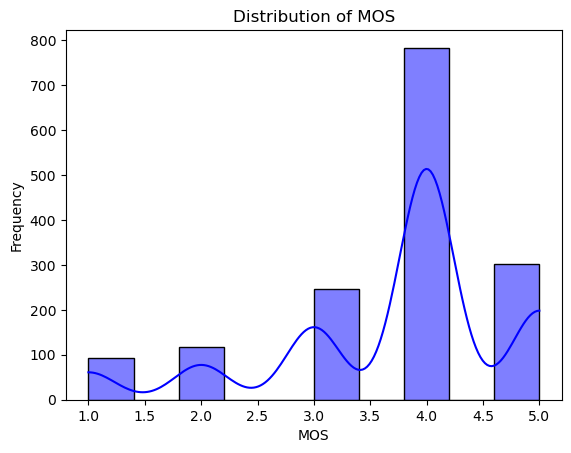

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# MOS distribution
sns.histplot(data['MOS'], bins=10, kde=True, color='blue')
plt.title('Distribution of MOS')
plt.xlabel('MOS')
plt.ylabel('Frequency')
plt.show



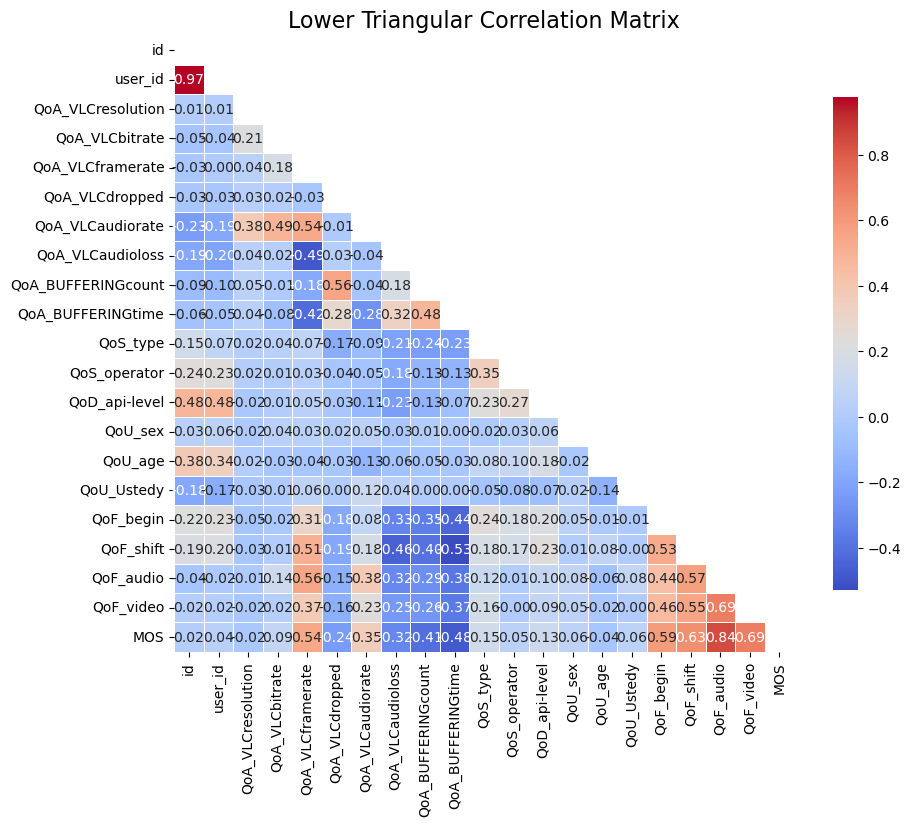

In [23]:
# Select only numerical columns for correlation calculation
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns

# Compute correlation matrix for numerical columns
correlation_matrix = data[numerical_cols].corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap with the mask
sns.heatmap(
    correlation_matrix, 
    mask=mask, 
    cmap='coolwarm',  # Choose a color palette
    annot=True,       # Annotate with correlation values
    fmt=".2f",        # Format for the annotations
    linewidths=0.5,   # Add lines between cells
    cbar_kws={"shrink": 0.8}  # Adjust colorbar size
)

plt.title("Lower Triangular Correlation Matrix", fontsize=16)
plt.show()



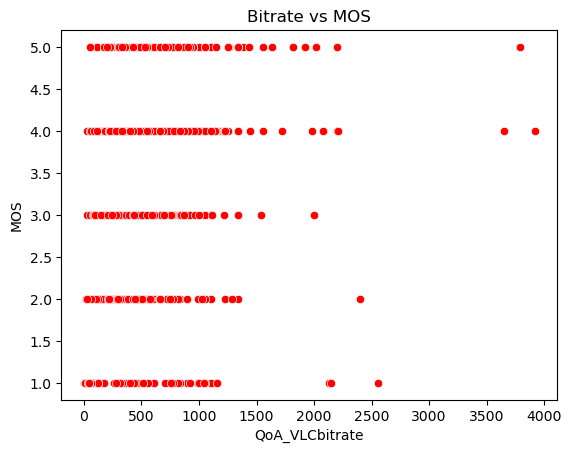

In [12]:
# Explore relationships between features and MOS
sns.scatterplot(x='QoA_VLCbitrate', y='MOS', data=data, color='red')
plt.title("Bitrate vs MOS")
plt.show()

Users might still rate a video poorly (low MOS) despite a high bitrate if they experience frequent buffering.

Hypothesis: Higher buffering time and count will negatively impact MOS, even if the bitrate is high.

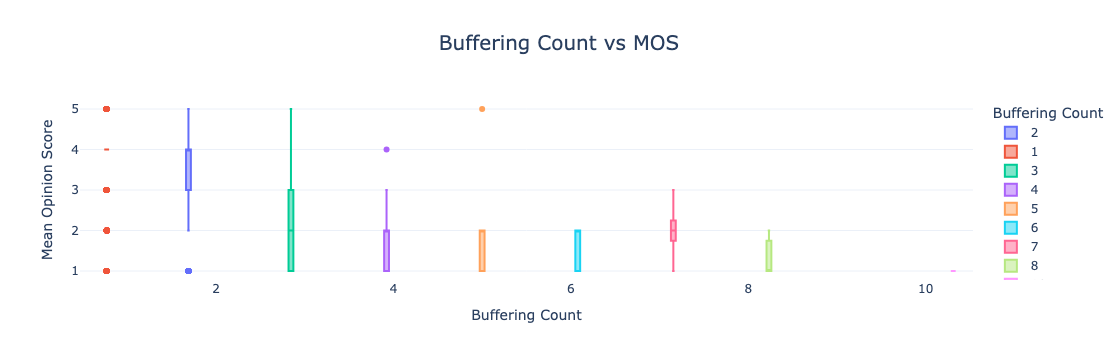

In [19]:
# Interactive Boxplot: Buffering Count vs MOS
fig = px.box(
    data, 
    x='QoA_BUFFERINGcount', 
    y='MOS', 
    color='QoA_BUFFERINGcount',  # Use buffering count as a color category
    title="Buffering Count vs MOS",
    labels={'QoA_BUFFERINGcount': 'Buffering Count', 'MOS': 'Mean Opinion Score'},
    template='plotly_white'
)

fig.update_layout(
    boxmode='group',  # Grouped boxplot mode
    title_font=dict(size=20),
    title_x=0.5  # Center the title
)

fig.show()


Dropped frames (QoA_VLCdropped) affect smoothness, which can degrade user experience. Investigate if dropped frames explain low MOS at high bitrates.

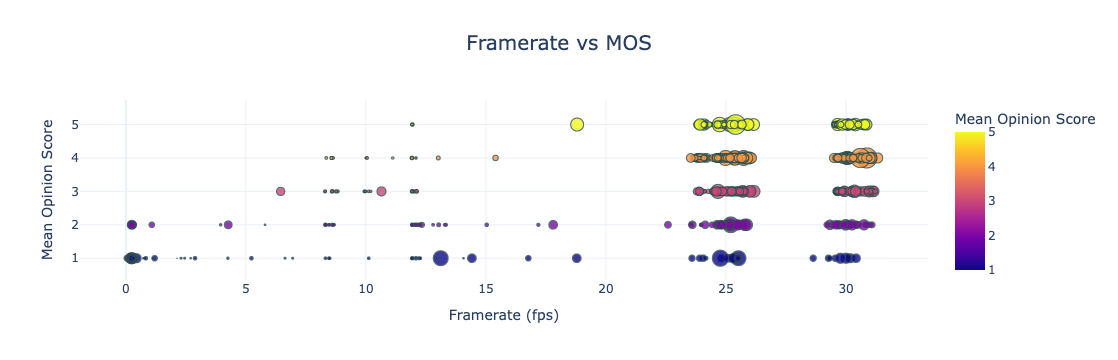

In [20]:
# Interactive Scatterplot: Framerate vs MOS
fig = px.scatter(
    data, 
    x='QoA_VLCframerate', 
    y='MOS', 
    color='MOS',
    size='QoA_VLCbitrate',  # Bubble size based on bitrate
    title="Framerate vs MOS",
    labels={'QoA_VLCframerate': 'Framerate (fps)', 'MOS': 'Mean Opinion Score'},
    template='plotly_white'
)

fig.update_traces(marker=dict(opacity=0.8, line=dict(width=1, color='DarkSlateGrey')))
fig.update_layout(title_font=dict(size=20), title_x=0.5)

fig.show()


Long buffering times typically frustrate users. Check if there’s a strong negative correlation between buffering time and MOS.

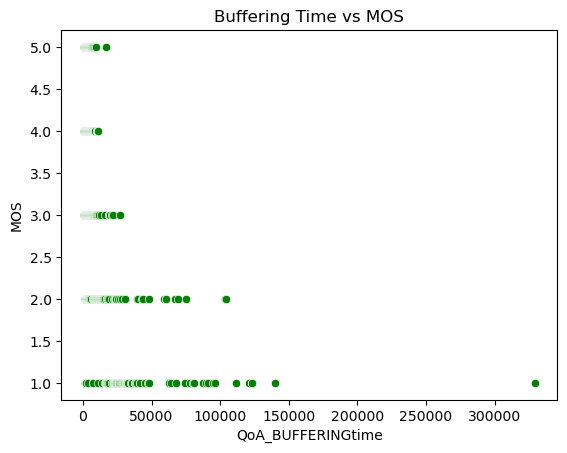

In [15]:
sns.scatterplot(x='QoA_BUFFERINGtime', y='MOS', data=data, color='green')
plt.title("Buffering Time vs MOS")
plt.show()

Dropped frames impact video smoothness, and higher dropped frames usually reduce MOS.
Check if there’s a threshold beyond which MOS starts to drop drastically.

/var/folders/qr/p596y49115zbhg_s900sljzh0000gn/T/ipykernel_99202/2515285717.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='QoA_VLCdropped', y='MOS', data=data, palette='coolwarm')


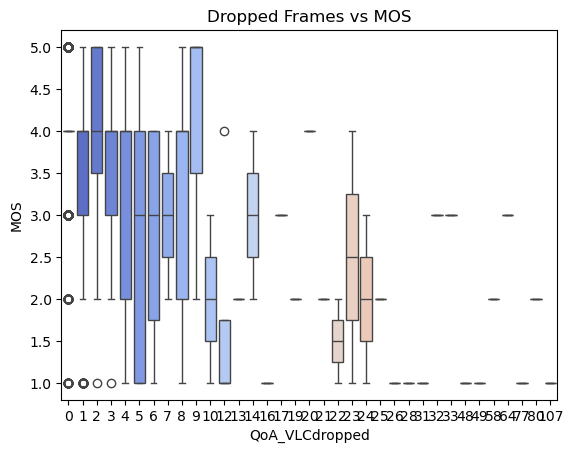

In [16]:
sns.boxplot(x='QoA_VLCdropped', y='MOS', data=data, palette='coolwarm')
plt.title("Dropped Frames vs MOS")
plt.show()

In [29]:
# Step 3: Convert Data Types if Necessary (e.g., 'QoU_sex' as categorical)
data['QoU_sex'] = data['QoU_sex'].astype('category')
data['QoS_operator'] = data['QoS_operator'].astype('category')
data['QoD_os-version'] = data['QoD_os-version'].astype('category')
data['QoD_model'] = data['QoD_model'].astype('category')



In [28]:
data.head(10)

id  user_id  QoA_VLCresolution  QoA_VLCbitrate  QoA_VLCframerate  \
0   590       71                360       528.39294         24.950000   
1   428       46                360       402.64664         30.066667   
2   406       44                360       735.84070         24.200000   
3  1256      133                240       529.48830         24.116667   
4   244       22                360       736.00085         24.066667   
5   179       13                360       528.58900         24.800000   
6   464       52                360       658.07920         24.733333   
7   273       26                360       565.17450         25.050000   
8   395       42                360       567.29980         24.700000   
9   363       38                360       217.11320         30.000000   

   QoA_VLCdropped  QoA_VLCaudiorate  QoA_VLCaudioloss  QoA_BUFFERINGcount  \
0               0         43.800000                 0                   2   
1               0         44.200000                 0                   2   
2               0         44.183333                 0                   2   
3               9         43.850000                 0                   2   
4               0         43.850000                 0                   2   
5               1         43.800000                 0                   2   
6               0         43.800000                 0                   2   
7               0         44.483333                 0                   2   
8               0         43.783333                 0                   2   
9               0         43.966667                 0                   2   

   QoA_BUFFERINGtime  QoS_type QoS_operator   QoD_model        QoD_os-version  \
0                683         4            2  HTC One X+      4.1.1(122573.16)   
1                690         5            4    GT-I9195   4.4.2(I9195XXUCNK1)   
2                840         2            2    GT-I9300    4.1.2(I9300XXELL4)   
3                868         2            2       D5803         4.4.4(suv3Rw)   
4                869         4            4    GT-I9300    4.1.2(I9300XXELL4)   
5                873         3            4    GT-I9195   4.4.2(I9195XXUCNK1)   
6                876         5            4    SM-G900F  4.4.2(G900FXXU1ANG2)   
7                887         4            4    GT-I9195   4.4.2(I9195XXUCNK1)   
8                890         5            4  HTC One X+      4.1.1(122573.16)   
9                912         4            2    GT-I9195   4.4.2(I9195XXUCNK1)   

   QoD_api-level QoU_sex  QoU_age  QoU_Ustedy  QoF_begin  QoF_shift  \
0             16       1       20           5          3          5   
1             19       1       25           5          4          5   
2             16       1       22           5          3          5   
3             19       1       31           5          4          5   
4             16       0       26           5          5          5   
5             19       1       29           5          5          5   
6             19       1       26           5          4          5   
7             19       1       33           5          3          5   
8             16       1       26           5          2          5   
9             19       0       19           5          4          5   

   QoF_audio  QoF_video  MOS  
0          3          4    3  
1          5          5    5  
2          4          4    4  
3          5          5    5  
4          4          5    5  
5          4          5    4  
6          5          5    5  
7          5          4    4  
8          4          4    3  
9          4          5    4

## Retention model

In [9]:
# Define the target variable
data['retention'] = data['MOS'].apply(lambda x: 1 if x >= 4 else 0)

In [10]:
# Drop the original MOS column if no longer needed
data.drop(columns=['MOS'], inplace=True)

In [11]:
data.head()

id  user_id  QoA_VLCresolution  QoA_VLCbitrate  QoA_VLCframerate  \
0   590       71                360       528.39294         24.950000   
1   428       46                360       402.64664         30.066667   
2   406       44                360       735.84070         24.200000   
3  1256      133                240       529.48830         24.116667   
4   244       22                360       736.00085         24.066667   

   QoA_VLCdropped  QoA_VLCaudiorate  QoA_VLCaudioloss  QoA_BUFFERINGcount  \
0               0         43.800000                 0                   2   
1               0         44.200000                 0                   2   
2               0         44.183333                 0                   2   
3               9         43.850000                 0                   2   
4               0         43.850000                 0                   2   

   QoA_BUFFERINGtime  QoS_type  QoS_operator   QoD_model       QoD_os-version  \
0                683         4             2  HTC One X+     4.1.1(122573.16)   
1                690         5             4    GT-I9195  4.4.2(I9195XXUCNK1)   
2                840         2             2    GT-I9300   4.1.2(I9300XXELL4)   
3                868         2             2       D5803        4.4.4(suv3Rw)   
4                869         4             4    GT-I9300   4.1.2(I9300XXELL4)   

   QoD_api-level  QoU_sex  QoU_age  QoU_Ustedy  QoF_begin  QoF_shift  \
0             16        1       20           5          3          5   
1             19        1       25           5          4          5   
2             16        1       22           5          3          5   
3             19        1       31           5          4          5   
4             16        0       26           5          5          5   

   QoF_audio  QoF_video  retention  
0          3          4          0  
1          5          5          1  
2          4          4          1  
3          5          5          1  
4          4          5          1

In [12]:
# Check for missing values
print(data.isnull().sum())


id                    0
user_id               0
QoA_VLCresolution     0
QoA_VLCbitrate        0
QoA_VLCframerate      0
QoA_VLCdropped        0
QoA_VLCaudiorate      0
QoA_VLCaudioloss      0
QoA_BUFFERINGcount    0
QoA_BUFFERINGtime     0
QoS_type              0
QoS_operator          0
QoD_model             0
QoD_os-version        0
QoD_api-level         0
QoU_sex               0
QoU_age               0
QoU_Ustedy            0
QoF_begin             0
QoF_shift             0
QoF_audio             0
QoF_video             0
retention             0
dtype: int64


In [13]:
# Fill missing values for numerical and categorical columns
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = data.select_dtypes(include=['object']).columns


In [14]:
numerical_cols

Index(['id', 'user_id', 'QoA_VLCresolution', 'QoA_VLCbitrate',
       'QoA_VLCframerate', 'QoA_VLCdropped', 'QoA_VLCaudiorate',
       'QoA_VLCaudioloss', 'QoA_BUFFERINGcount', 'QoA_BUFFERINGtime',
       'QoS_type', 'QoS_operator', 'QoD_api-level', 'QoU_sex', 'QoU_age',
       'QoU_Ustedy', 'QoF_begin', 'QoF_shift', 'QoF_audio', 'QoF_video',
       'retention'],
      dtype='object')

In [15]:
categorical_cols

Index(['QoD_model', 'QoD_os-version'], dtype='object')

In [16]:
# Fill numerical columns with mean
data[numerical_cols] = data[numerical_cols].fillna(data[numerical_cols].mean())


In [17]:
# Fill categorical columns with mode
for col in categorical_cols:
    data[col].fillna(data[col].mode()[0], inplace=True)

/var/folders/qr/p596y49115zbhg_s900sljzh0000gn/T/ipykernel_89048/3347855258.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mode()[0], inplace=True)


In [18]:
from sklearn.preprocessing import LabelEncoder

# Example: Label encoding for QoU_sex
label_enc = LabelEncoder()
data['QoU_sex'] = label_enc.fit_transform(data['QoU_sex'])


In [19]:
data['QoD_os-version'].value_counts()

QoD_os-version
4.4.4(suv3Rw)             577
4.4.2(I9195XXUCNK1)       278
4.1.1(122573.16)          159
4.1.2(I9300XXELL4)        123
4.4.2(G900FXXU1ANG2)       67
4.4.2(I9195XXUCNK4)        61
4.0.4(20130118.175432)     55
5.0.1(1602158)             44
4.4.2(N9005XXUGNI4)        37
5.1.1(456c49d1b2)          36
5.0(G900FXXU1BOC2)         31
5.0.1(457188.4)            24
4.3(I9300XXUGNB5)          18
5.1.1(478106bf5f)          11
5.0(G900FXXU1BOC7)         10
4.3(I9506XXUBML5)           8
4.4.2(G900FXXU1ANJ1)        3
4.4.2(G900FXXU1ANG9)        1
Name: count, dtype: int64

In [20]:
# One-hot encoding for QoD_os-version (if it has many unique values)
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

In [21]:
data.head()

id  user_id  QoA_VLCresolution  QoA_VLCbitrate  QoA_VLCframerate  \
0   590       71                360       528.39294         24.950000   
1   428       46                360       402.64664         30.066667   
2   406       44                360       735.84070         24.200000   
3  1256      133                240       529.48830         24.116667   
4   244       22                360       736.00085         24.066667   

   QoA_VLCdropped  QoA_VLCaudiorate  QoA_VLCaudioloss  QoA_BUFFERINGcount  \
0               0         43.800000                 0                   2   
1               0         44.200000                 0                   2   
2               0         44.183333                 0                   2   
3               9         43.850000                 0                   2   
4               0         43.850000                 0                   2   

   QoA_BUFFERINGtime  QoS_type  QoS_operator  QoD_api-level  QoU_sex  QoU_age  \
0                683         4             2             16        1       20   
1                690         5             4             19        1       25   
2                840         2             2             16        1       22   
3                868         2             2             19        1       31   
4                869         4             4             16        0       26   

   QoU_Ustedy  QoF_begin  QoF_shift  QoF_audio  QoF_video  retention  \
0           5          3          5          3          4          0   
1           5          4          5          5          5          1   
2           5          3          5          4          4          1   
3           5          4          5          5          5          1   
4           5          5          5          4          5          1   

   QoD_model_D5802  QoD_model_D5803  QoD_model_GT-I9189  QoD_model_GT-I9191  \
0            False            False               False               False   
1            False            False               False               False   
2            False            False               False               False   
3            False             True               False               False   
4            False            False               False               False   

   QoD_model_GT-I9192  QoD_model_GT-I9193  QoD_model_GT-I9194  \
0               False               False               False   
1               False               False               False   
2               False               False               False   
3               False               False               False   
4               False               False               False   

   QoD_model_GT-I9195  QoD_model_GT-I9300  QoD_model_HTC One X+  \
0               False               False                  True   
1                True               False                 False   
2               False                True                 False   
3               False               False                 False   
4               False                True                 False   

   QoD_model_HTC One_M8  QoD_model_Nexus 4  QoD_model_SM-G900F  \
0                 False              False               False   
1                 False              False               False   
2                 False              False               False   
3                 False              False               False   
4                 False              False               False   

   QoD_model_SM-N9005  QoD_os-version_4.1.1(122573.16)  \
0               False                             True   
1               False                            False   
2               False                            False   
3               False                            False   
4               False                            False   

   QoD_os-version_4.1.2(I9300XXELL4)  QoD_os-version_4.3(I9300XXUGNB5)  \
0                              False                             False   
1                   

In [22]:
from sklearn.preprocessing import StandardScaler

# # Standardize numerical columns
# scaler = StandardScaler()
# numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
# data[numerical_cols] = scaler.fit_transform(data[numerical_cols])


In [23]:
numerical_cols

Index(['id', 'user_id', 'QoA_VLCresolution', 'QoA_VLCbitrate',
       'QoA_VLCframerate', 'QoA_VLCdropped', 'QoA_VLCaudiorate',
       'QoA_VLCaudioloss', 'QoA_BUFFERINGcount', 'QoA_BUFFERINGtime',
       'QoS_type', 'QoS_operator', 'QoD_api-level', 'QoU_sex', 'QoU_age',
       'QoU_Ustedy', 'QoF_begin', 'QoF_shift', 'QoF_audio', 'QoF_video',
       'retention'],
      dtype='object')

In [24]:
from sklearn.model_selection import train_test_split,GridSearchCV

# Define features and target
X = data.drop(columns=['retention', 'id', 'user_id'])  # Drop target and irrelevant columns
y = data['retention'].astype(int) 


# Standardize only the numerical feature columns (X)
scaler = StandardScaler()
numerical_cols = X.select_dtypes(include=['float64', 'int64']).columns
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])


# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


In [25]:
y_train.unique()

array([0, 1])

In [26]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the model
clf = RandomForestClassifier(random_state=42, n_estimators=100)
clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [27]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.8920086393088553
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.83      0.82       137
           1       0.93      0.92      0.92       326

    accuracy                           0.89       463
   macro avg       0.87      0.87      0.87       463
weighted avg       0.89      0.89      0.89       463

Confusion Matrix:
 [[114  23]
 [ 27 299]]


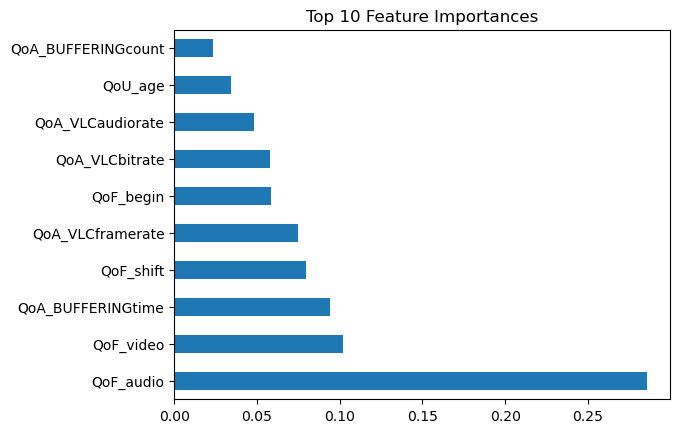

In [28]:
import matplotlib.pyplot as plt

# Feature importance from Random Forest
feature_importances = pd.Series(clf.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Feature Importances')
plt.show()


## Define GridSearchCV and Perform Hyperparameter Tuning

In [29]:
# Define the model
rf = RandomForestClassifier(random_state=42)

# Set up hyperparameters for tuning
param_grid_rf = {
    'n_estimators': [50, 100, 200],        # Number of trees
    'max_depth': [None, 10, 20, 30],        # Maximum depth of trees
    'min_samples_split': [2, 5, 10],        # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],          # Minimum samples required at leaf node
    'max_features': ['auto', 'sqrt', 'log2'] # Number of features to consider for each split
}

# Initialize GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit the model
grid_search_rf.fit(X_train, y_train)

# Best hyperparameters and model
print("Best Hyperparameters for Random Forest:", grid_search_rf.best_params_)
best_rf = grid_search_rf.best_estimator_

# Evaluate the model
y_pred_rf = best_rf.predict(X_test)
print("Accuracy after tuning (Random Forest):", accuracy_score(y_test, y_pred_rf))


Fitting 5 folds for each of 324 candidates, totalling 1620 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_spli

/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
259 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 1467, in wrapper
    estimator._validate_params()
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/opt/anaconda3/lib/python3.12/site-

In [30]:
import xgboost as xgb

# Define the model
xgb_model = xgb.XGBClassifier(random_state=42, objective='binary:logistic')

# Set up hyperparameters for tuning
param_grid_xgb = {
    'n_estimators': [50, 100, 200],          # Number of boosting rounds
    'learning_rate': [0.01, 0.05, 0.1],      # Step size
    'max_depth': [3, 6, 10],                  # Maximum depth of trees
    'min_child_weight': [1, 3, 5],            # Minimum sum of instance weight
    'subsample': [0.7, 0.8, 1.0]             # Fraction of samples for each round
}

# Initialize GridSearchCV
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit the model
grid_search_xgb.fit(X_train, y_train)

# Best hyperparameters and model
print("Best Hyperparameters for XGBoost:", grid_search_xgb.best_params_)
best_xgb = grid_search_xgb.best_estimator_

# Evaluate the model
y_pred_xgb = best_xgb.predict(X_test)
print("Accuracy after tuning (XGBoost):", accuracy_score(y_test, y_pred_xgb))


Fitting 5 folds for each of 243 candidates, totalling 1215 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5

In [31]:
y_train.unique()

array([0, 1])

In [32]:
import lightgbm as lgb

# Define the model
lgbm_model = lgb.LGBMClassifier(random_state=42)

param_grid_lgbm = {
    'n_estimators': [50, 100,200],              # Reduce number of options
    'learning_rate': [0.01, 0.05, 0.1],          # Focus on common values
    'num_leaves': [31, 63],                # Reduce complexity
    'max_depth': [3, 6, 10]                  # Narrow depth range
}


# Initialize GridSearchCV
grid_search_lgbm = GridSearchCV(estimator=lgbm_model, param_grid=param_grid_lgbm, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit the model
grid_search_lgbm.fit(X_train, y_train)

# Best hyperparameters and model
print("Best Hyperparameters for LightGBM:", grid_search_lgbm.best_params_)
best_lgbm = grid_search_lgbm.best_estimator_

# Evaluate the model
y_pred_lgbm = best_lgbm.predict(X_test)
print("Accuracy after tuning (LightGBM):", accuracy_score(y_test, y_pred_lgbm))


Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.2s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.3s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.3s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.3s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.3s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimato

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initialize Logistic Regression model
logistic_model = LogisticRegression(random_state=42, max_iter=1000)

# Fit the model on the training data
logistic_model.fit(X_train, y_train)

# Predict on the test set
y_pred_logistic = logistic_model.predict(X_test)

# Calculate accuracy
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
print("Accuracy (Logistic Regression):", accuracy_logistic)


Accuracy (Logistic Regression): 0.8898488120950324


Logistic Regression performed better because:

The data likely exhibits linear patterns, which Logistic Regression handles well.
Logistic Regression is simpler, less prone to overfitting, and well-suited for smaller or less complex datasets.
XGBoost’s complexity may not have been fully utilized due to the dataset's nature or suboptimal hyperparameter tuning.

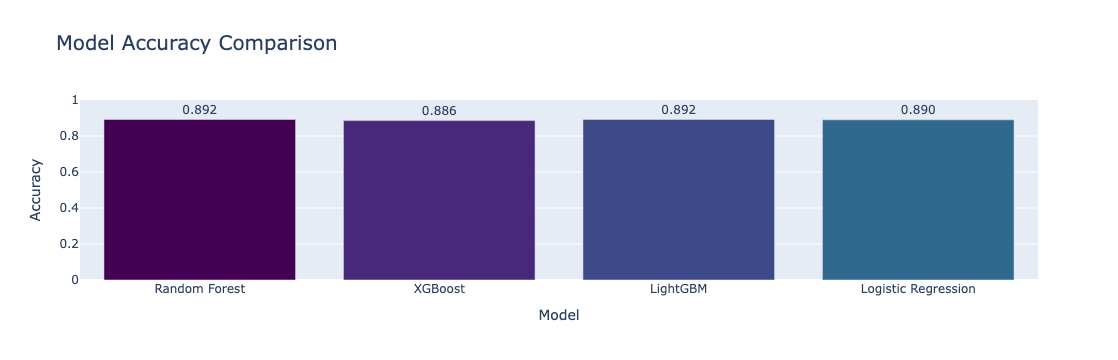

In [34]:
import plotly.express as px

# Define data for the plot
results = {
    'Model': ['Random Forest', 'XGBoost', 'LightGBM', 'Logistic Regression'],
    'Accuracy': [
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred_xgb),
        accuracy_score(y_test, y_pred_lgbm),
        accuracy_logistic
    ]
}

# Create a DataFrame for Plotly
results_df = pd.DataFrame(results)

# Create an interactive bar chart
fig = px.bar(
    results_df,
    x='Model',
    y='Accuracy',
    text='Accuracy',  # Display accuracy values on bars
    title='Model Accuracy Comparison',
    labels={'Accuracy': 'Accuracy Score', 'Model': 'Model Name'},
    color='Model',  # Different colors for each bar
    color_discrete_sequence=px.colors.sequential.Viridis
)

# Enhance interactivity and appearance
fig.update_traces(texttemplate='%{text:.3f}', textposition='outside')
fig.update_layout(
    title_font_size=20,
    xaxis_title='Model',
    yaxis_title='Accuracy',
    yaxis=dict(range=[0, 1]),  # Set y-axis range to 0-1 (accuracy range)
    showlegend=False  # Hide legend as Model names are already on x-axis
)

# Show interactive plot
fig.show()


User Behavior Analysis

Correlation Matrix:
            QoU_age  retention
QoU_age    1.000000  -0.039009
retention -0.039009   1.000000


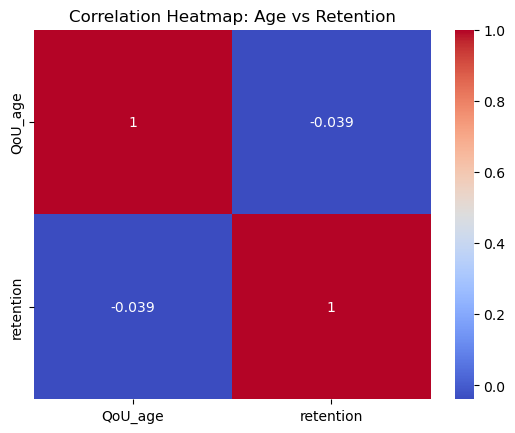

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [39]:
# Analyze correlations between numerical demographics and retention
correlation_matrix = data[['QoU_age', 'retention']].corr()

print("Correlation Matrix:")
print(correlation_matrix)

# Heatmap visualization
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap: Age vs Retention")
plt.show()


In [40]:
# Analyze retention by gender
gender_retention = data.groupby('QoU_sex')['retention'].mean().reset_index()

print("Retention by Gender:")
print(gender_retention)


Retention by Gender:
   QoU_sex  retention
0        0   0.605381
1        1   0.720455


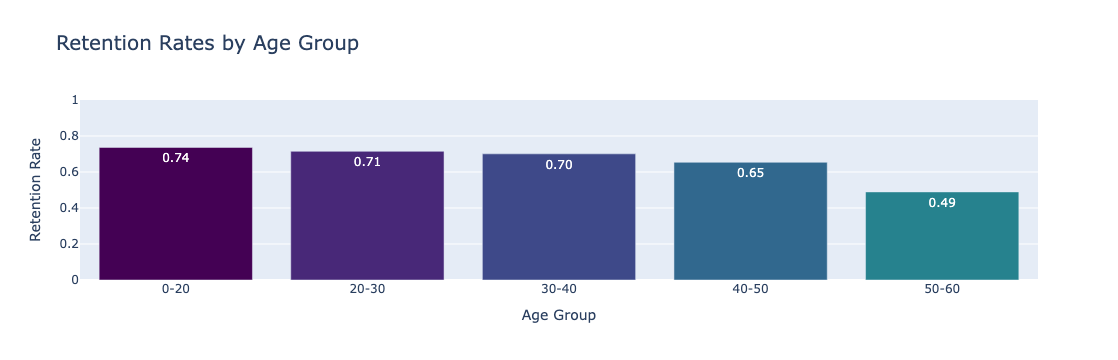

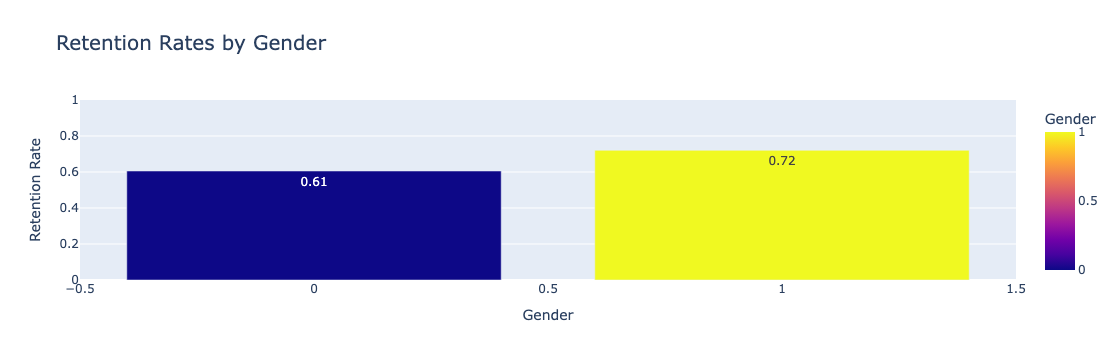

In [44]:
import plotly.express as px

# Retention rates by age groups
data['age_group'] = pd.cut(
    data['QoU_age'], 
    bins=[0, 20, 30, 40, 50, 60, 100], 
    labels=['0-20', '20-30', '30-40', '40-50', '50-60', '60+']
)
age_retention = data.groupby('age_group', observed=True)['retention'].mean().reset_index()

# Plot retention rates by age group
fig = px.bar(
    age_retention,
    x='age_group',
    y='retention',
    text='retention',
    title='Retention Rates by Age Group',
    labels={'retention': 'Retention Rate', 'age_group': 'Age Group'},
    color='age_group',
    color_discrete_sequence=px.colors.sequential.Viridis
)

# Format text and improve layout
fig.update_traces(
    texttemplate='%{text:.2f}',  # Limit decimal places for better readability
    textposition='inside'       # Place the text inside the bars
)
fig.update_layout(
    title_font_size=20,
    xaxis_title='Age Group',
    yaxis_title='Retention Rate',
    yaxis=dict(range=[0, 1]),   # Ensure bars fit within the graph by setting range
    showlegend=False,
    uniformtext_minsize=12,     # Uniform text size
    uniformtext_mode='hide'     # Prevent text from overlapping if bars are small
)

fig.show()

# Plot retention rates by gender
gender_retention = data.groupby('QoU_sex', observed=True)['retention'].mean().reset_index()

fig = px.bar(
    gender_retention,
    x='QoU_sex',
    y='retention',
    text='retention',
    title='Retention Rates by Gender',
    labels={'retention': 'Retention Rate', 'QoU_sex': 'Gender'},
    color='QoU_sex',
    color_discrete_sequence=px.colors.qualitative.Pastel
)

# Format text and improve layout
fig.update_traces(
    texttemplate='%{text:.2f}',  # Limit decimal places
    textposition='inside'       # Place text inside bars
)
fig.update_layout(
    title_font_size=20,
    xaxis_title='Gender',
    yaxis_title='Retention Rate',
    yaxis=dict(range=[0, 1]),   # Ensure bars fit within the graph by setting range
    showlegend=False,
    uniformtext_minsize=12,
    uniformtext_mode='hide'
)

fig.show()


In [43]:
# Add new features based on demographic analysis
data['is_young_adult'] = (data['QoU_age'] >= 20) & (data['QoU_age'] < 30)
data['is_female'] = (data['QoU_sex'] == 'Female').astype(int)

# Include these features in the predictive model
X = data.drop(columns=['retention', 'id', 'user_id'])
y = data['retention']
